# **Introduction of Variables**
Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# **Initialisation**

In [8]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

time: 16 ms (started: 2023-11-16 15:38:08 +08:00)


In [9]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 5.92 s (started: 2023-11-16 15:38:08 +08:00)


Decision Tree

In [33]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

time: 0 ns (started: 2023-11-16 15:42:59 +08:00)


Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

time: 15 ms (started: 2023-11-16 15:38:14 +08:00)


Gaussian Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

time: 0 ns (started: 2023-11-16 15:38:14 +08:00)


GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV


time: 0 ns (started: 2023-11-16 15:38:14 +08:00)


# **Data Acquisition**

In [14]:
df = pd.read_csv('cardio_trainas.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


time: 219 ms (started: 2023-11-16 15:38:14 +08:00)


In [15]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


time: 110 ms (started: 2023-11-16 15:38:14 +08:00)


So we can see that for minimum age = 10798 / 365 = 29 Years Old,
* Weight cannot be 10KG
* Height cannot be 55cm

and for ap_hi and ap_lo,
* A person's systolic blood pressure value should be within the range of 100-140
* A person's diastolic blood pressure value should be within the range of 60-90

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
time: 31 ms (started: 2023-11-16 15:38:14 +08:00)


# **Data Preparation**

## *Dataset Clarity*

Creation of Age_Year Variable


*   Shows Age in numbers of Years instead of in Number of Days




Removal of Age Variable


*   Misleading and Unnecessary




In [17]:
cardio_df= df.drop(columns='id')
cardio_df.dropna()

cardio_df['age_year']= (cardio_df['age']/365).round().astype('int')
cardio_df= cardio_df.drop(columns='age')

time: 31 ms (started: 2023-11-16 15:38:14 +08:00)


In [18]:
cardio_df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


time: 109 ms (started: 2023-11-16 15:38:14 +08:00)


Determine Gender Variables


*   Gender given in dataset did NOT specify whether male / female is 1 / 2
*   In order to determine gender, we take all data in Gender and find the Mean for Height and Weight for both Gender binary code.



In [19]:
cardio_df.groupby('gender')['height', 'weight'].mean().round(2)

C:\Users\Nicho\AppData\Local\Temp\ipykernel_11496\3913900484.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cardio_df.groupby('gender')['height', 'weight'].mean().round(2)


,height,weight
gender,,
1,161.36,72.57
2,169.95,77.26


time: 16 ms (started: 2023-11-16 15:38:15 +08:00)


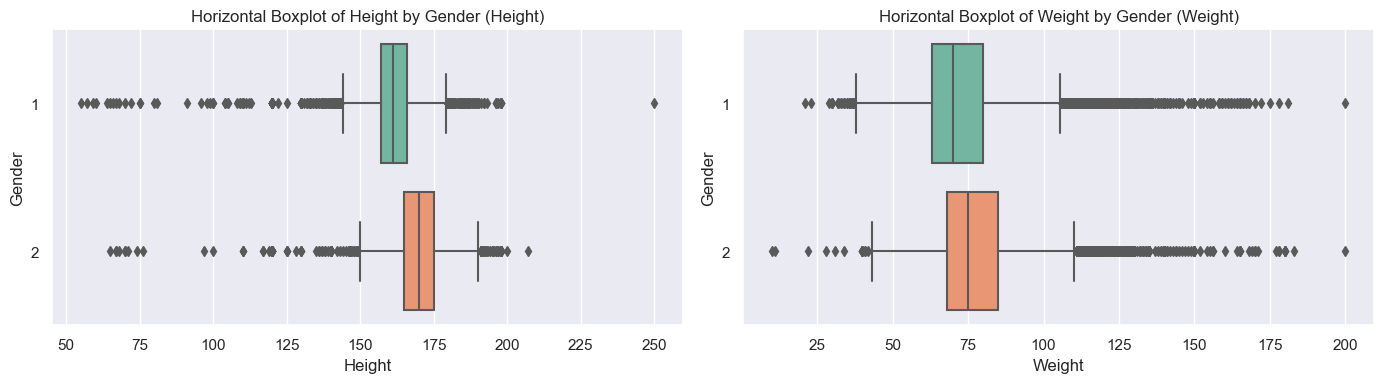

time: 1.12 s (started: 2023-11-16 15:38:15 +08:00)


In [20]:
# Create a figure with two horizontal boxplots side by side for height and weight by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Boxplot for height by gender
sb.boxplot(x='height', y='gender', data=cardio_df, palette='Set2', orient='h', ax=axes[0])
axes[0].set_title('Horizontal Boxplot of Height by Gender (Height)')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Gender')

# Boxplot for weight by gender
sb.boxplot(x='weight', y='gender', data=cardio_df, palette='Set2', orient='h', ax=axes[1])
axes[1].set_title('Horizontal Boxplot of Weight by Gender (Weight)')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Gender')

plt.tight_layout()
plt.show()

Therefore, As Male are generally taller and heavier than females, we can know that 1 is Female and 2 is Male.

## *Removing Outliers and Anomalies*

### Using KDE to find the 95% Confidence for Height and Weight, removing the 2.5% on both far ends to remove Outliers and Anomalies



In [21]:

# Filter the DataFrame based on quantiles for 'height'
height_quantile_low = cardio_df['height'].quantile(0.025)
height_quantile_high = cardio_df['height'].quantile(0.975)

# Drop rows based on quantiles for 'height'
cardio_df = cardio_df[(cardio_df['height'] >= height_quantile_low) & (cardio_df['height'] <= height_quantile_high)]

# Filter the DataFrame based on quantiles for 'weight'
weight_quantile_low = cardio_df['weight'].quantile(0.025)
weight_quantile_high = cardio_df['weight'].quantile(0.975)

# Drop rows based on quantiles for 'weight'
cardio_df = cardio_df[(cardio_df['weight'] >= weight_quantile_low) & (cardio_df['weight'] <= weight_quantile_high)]


time: 16 ms (started: 2023-11-16 15:38:16 +08:00)


In [22]:
cardio_df[['height', 'weight']].min()

height    150.0
weight     52.0
dtype: float64

time: 15 ms (started: 2023-11-16 15:38:16 +08:00)


In [23]:
cardio_df[['height', 'weight']].max()

height    180.0
weight    106.0
dtype: float64

time: 16 ms (started: 2023-11-16 15:38:16 +08:00)


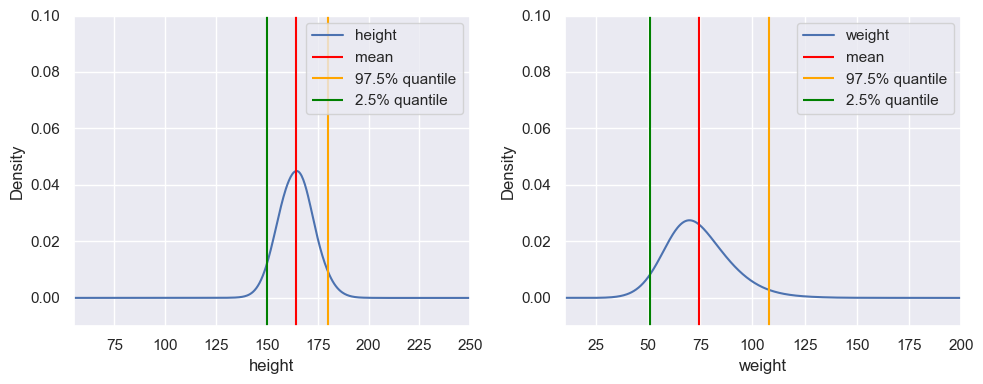

time: 7.03 s (started: 2023-11-16 15:38:16 +08:00)


In [24]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the kernel density estimate (KDE) of the 'height' column
df["height"].plot.kde(ax=axes[0], bw_method=0.5)

# Calculate the mean and quantiles from the 'height' column
mean_height = df["height"].mean()
q_975_height = df["height"].quantile(0.975)
q_025_height = df["height"].quantile(0.025)

# Plot the mean and quantiles for 'height'
axes[0].vlines(x=mean_height, ymin=-1, ymax=1, color='red', label='mean')
axes[0].vlines(x=q_975_height, ymin=-1, ymax=1, color='orange', label='97.5% quantile')
axes[0].vlines(x=q_025_height, ymin=-1, ymax=1, color='green', label='2.5% quantile')

axes[0].set_xlim([55, 250])  # Set x-axis limits
axes[0].set_ylim([-0.01, 0.1])
axes[0].set_xlabel("height")
axes[0].legend().set_title('')

# Plot the kernel density estimate (KDE) of the 'weight' column
df["weight"].plot.kde(ax=axes[1], bw_method=0.5)

# Calculate the mean and quantiles from the 'weight' column
mean_weight = df["weight"].mean()
q_975_weight = df["weight"].quantile(0.975)
q_025_weight = df["weight"].quantile(0.025)

# Plot the mean and quantiles for 'weight'
axes[1].vlines(x=mean_weight, ymin=-1, ymax=1, color='red', label='mean')
axes[1].vlines(x=q_975_weight, ymin=-1, ymax=1, color='orange', label='97.5% quantile')
axes[1].vlines(x=q_025_weight, ymin=-1, ymax=1, color='green', label='2.5% quantile')

axes[1].set_xlim([10, 200])  # Set x-axis limits
axes[1].set_ylim([-0.01, 0.1])
axes[1].set_xlabel("weight")
axes[1].legend().set_title('')

plt.tight_layout()
plt.show()

Therefore, now all values is within reasonable range, successfully elminating anomalies and outliers

*   Minimum height value = 150
*   Maximum height value = 180



*   Minimum weight value = 52
*   Maximum weight value = 106

### Using KDE to find the 95% Confidence for Height and Weight, removing the 2.5% on both far ends to remove Outliers and Anomalies

In [25]:
# Filter the DataFrame based on quantiles for 'ap_hi'
ap_hi_quantile_low = cardio_df['ap_hi'].quantile(0.025)
ap_hi_quantile_high = cardio_df['ap_hi'].quantile(0.975)

# Drop rows based on quantiles for 'ap_hi'
cardio_df = cardio_df[(cardio_df['ap_hi'] >= ap_hi_quantile_low) & (cardio_df['ap_hi'] <= ap_hi_quantile_high)]

# Filter the DataFrame based on quantiles for 'ap_lo'
ap_lo_quantile_low = cardio_df['ap_lo'].quantile(0.025)
ap_lo_quantile_high = cardio_df['ap_lo'].quantile(0.975)

# Drop rows based on quantiles for 'ap_lo'
cardio_df = cardio_df[(cardio_df['ap_lo'] >= ap_lo_quantile_low) & (cardio_df['ap_lo'] <= ap_lo_quantile_high)]

time: 47 ms (started: 2023-11-16 15:38:23 +08:00)


In [26]:
cardio_df[['ap_hi', 'ap_lo']].min()

ap_hi    100
ap_lo     60
dtype: int64

time: 16 ms (started: 2023-11-16 15:38:23 +08:00)


In [27]:
cardio_df[['ap_hi', 'ap_lo']].max()

ap_hi    163
ap_lo    100
dtype: int64

time: 15 ms (started: 2023-11-16 15:38:23 +08:00)


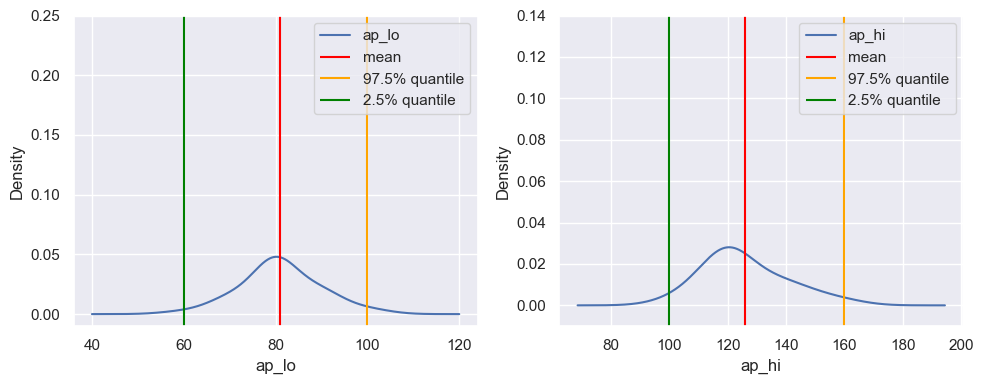

time: 4.72 s (started: 2023-11-16 15:38:23 +08:00)


In [28]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the kernel density estimate (KDE) of the 'ap_lo' column
cardio_df["ap_lo"].plot.kde(ax=axes[0], bw_method =0.6)

# Calculate the mean and quantiles from the 'ap_lo' column
mean_ap_lo = cardio_df["ap_lo"].mean()
q_975_ap_lo = np.percentile(cardio_df["ap_lo"], 97.5)
q_025_ap_lo = np.percentile(cardio_df["ap_lo"], 2.5)

# Plot the mean and quantiles for 'ap_lo'
axes[0].vlines(x=mean_ap_lo, ymin=-1, ymax=1, color='red', label='mean')
axes[0].vlines(x=q_975_ap_lo, ymin=-1, ymax=1, color='orange', label='97.5% quantile')
axes[0].vlines(x=q_025_ap_lo, ymin=-1, ymax=1, color='green', label='2.5% quantile')


axes[0].set_ylim([-0.01, 0.25])
axes[0].set_xlabel("ap_lo")
axes[0].legend().set_title('')

# Plot the kernel density estimate (KDE) of the 'ap_hi' column
cardio_df["ap_hi"].plot.kde(ax=axes[1], bw_method=0.6)

# Calculate the mean and quantiles from the 'ap_hi' column
mean_ap_hi = cardio_df["ap_hi"].mean()
q_975_ap_hi = np.percentile(cardio_df["ap_hi"], 97.5)
q_025_ap_hi = np.percentile(cardio_df["ap_hi"], 2.5)

# Plot the mean and quantiles for 'ap_hi'
axes[1].vlines(x=mean_ap_hi, ymin=-1, ymax=1, color='red', label='mean')
axes[1].vlines(x=q_975_ap_hi, ymin=-1, ymax=1, color='orange', label='97.5% quantile')
axes[1].vlines(x=q_025_ap_hi, ymin=-1, ymax=1, color='green', label='2.5% quantile')

axes[1].set_ylim([-0.01, 0.14])
axes[1].set_xlabel("ap_hi")
axes[1].legend().set_title('')

plt.tight_layout()
plt.show()

Therefore, now all values is within reasonable range, successfully elminating anomalies and outliers

*   Minimum ap_hi value = 100
*   Maximum ap_hi value = 163



*   Minimum ap_lo value = 60
*   Maximum ap_lo value = 100







In [29]:
cardio_df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228,53.338798
std,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,6.746864
min,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


time: 110 ms (started: 2023-11-16 15:38:28 +08:00)


# **Exploratory Analysis and Visualisation**

## Using Decision Tree to find variables with lowest GINI for predicting Cardio.

In [35]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Extract Response and Predictors
y = pd.DataFrame(cardio_df['cardio'])
X = pd.DataFrame(cardio_df[['gender',   'height',   'weight',   'ap_hi',    'ap_lo',    'cholesterol',  'gluc', 'smoke',  'alco', 'active', 'age_year']])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

time: 140 ms (started: 2023-11-16 15:43:24 +08:00)


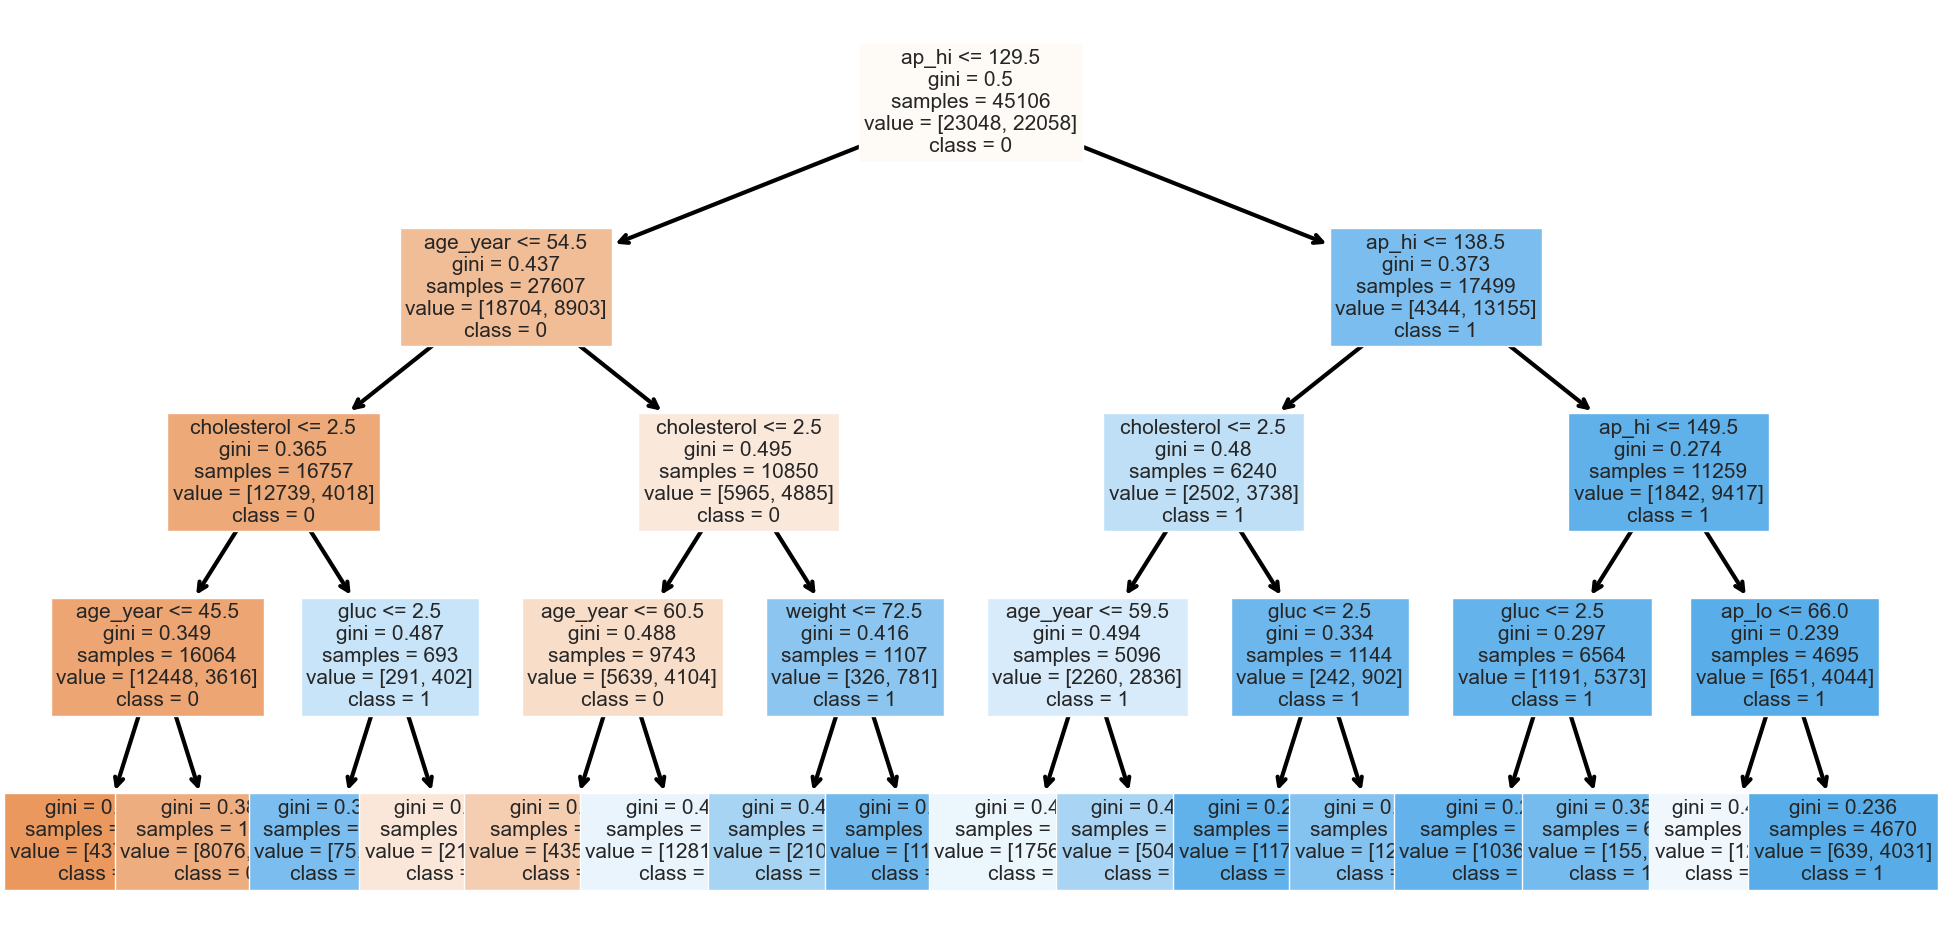

time: 2.19 s (started: 2023-11-16 15:45:10 +08:00)


In [38]:
fig, ax = plt.subplots(figsize=(24, 12))
out = plot_tree(dectree,
          feature_names = X_train.columns.tolist(),  # Convert Index to list
          class_names = [str(x) for x in dectree.classes_], fontsize=15,
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

Therefore, the 5 most important variables with the lowest GINI for predicting Cardio is

1.   ap_high
2.   age_year
3. cholesterol
4. gluc
5. ap_lo




## Using Confusion Matrix to find Accuracy of Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7233405755331885

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7184091513700452



<Axes: >

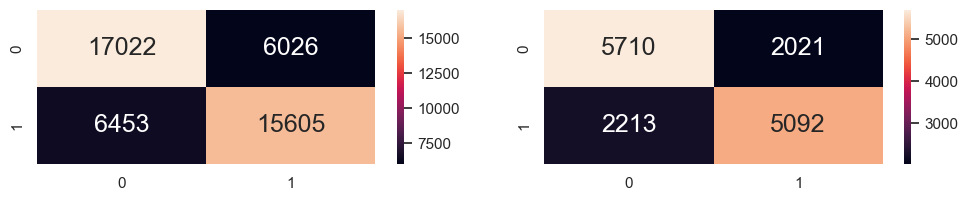

time: 1.03 s (started: 2023-11-16 15:45:12 +08:00)


In [39]:
#PREDICTION

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 2))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Using Correlation Heatmap to find the correlation between variables

Text(0.5, 1.0, 'Correlation Heatmap')

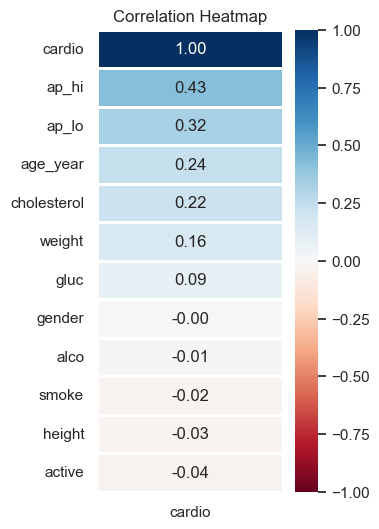

time: 703 ms (started: 2023-11-16 15:45:13 +08:00)


In [40]:
# Correlation Matrix
cardio_corr= cardio_df.corr()

# Heatmap of the Correlation Matrix
plt.figure(figsize=(3,6))
sb.heatmap(cardio_corr[['cardio']].sort_values(by=['cardio'], ascending = False), vmin=-1, vmax=1,
           linewidths = 0.8, annot=True, fmt = ".2f",  cmap='RdBu')
plt.title("Correlation Heatmap")

Therefore, the 5 variables with the highest correlation is

1.   ap_hi
2.   ap_lo
3. age_year
4. cholesterol
5. weight



# **Algorithmic Optimisation**

##Feature Engineering: Optimisation through Secondary Correlations and Relationships


Creation of Body Mass Index [BMI] variable using Height and Weight

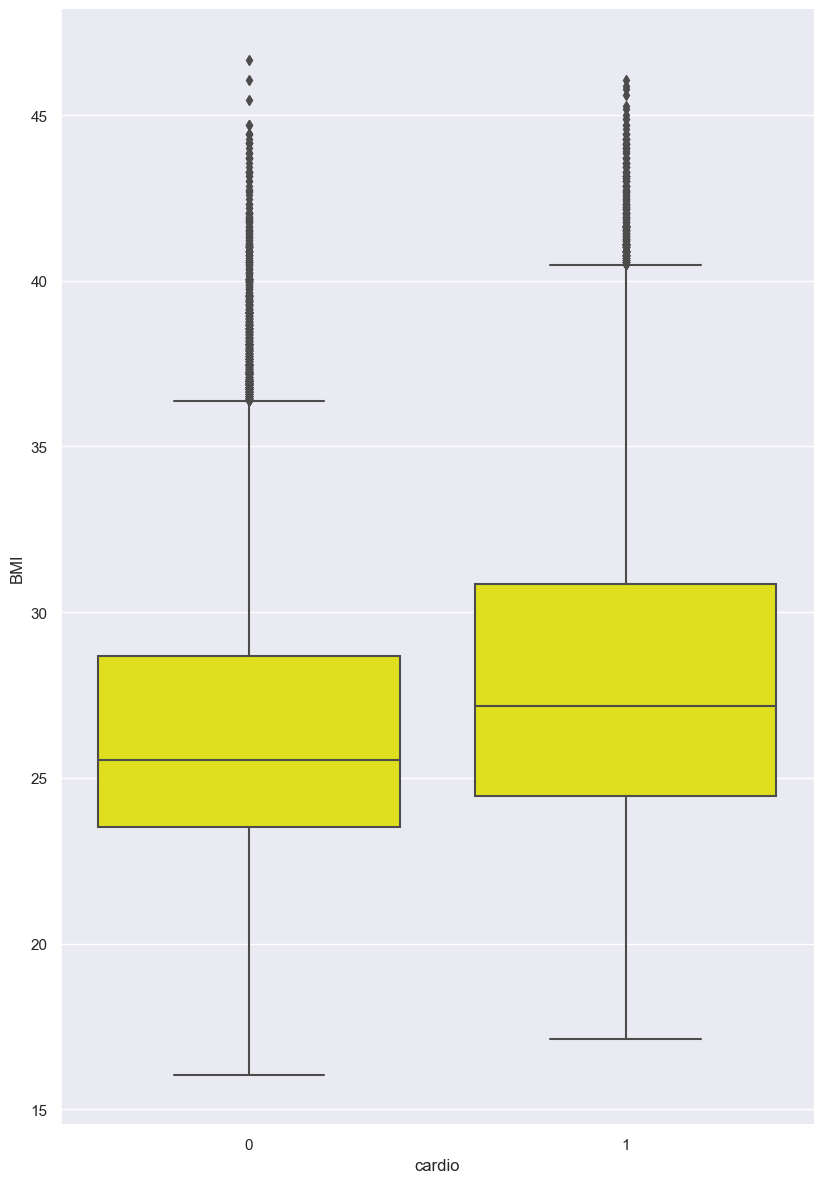

time: 656 ms (started: 2023-11-16 15:45:14 +08:00)


In [41]:
#Body Mass Index
cardio_df['BMI'] = (cardio_df['weight']/((cardio_df['height']/100)**2)).round(2)

sb.catplot(x="cardio", y="BMI",  data=cardio_df, color = "yellow",kind="box", height=12, aspect=.7)

Creation of Mean Arterial Pressure [MAP] variable using ap_hi and ap_lo

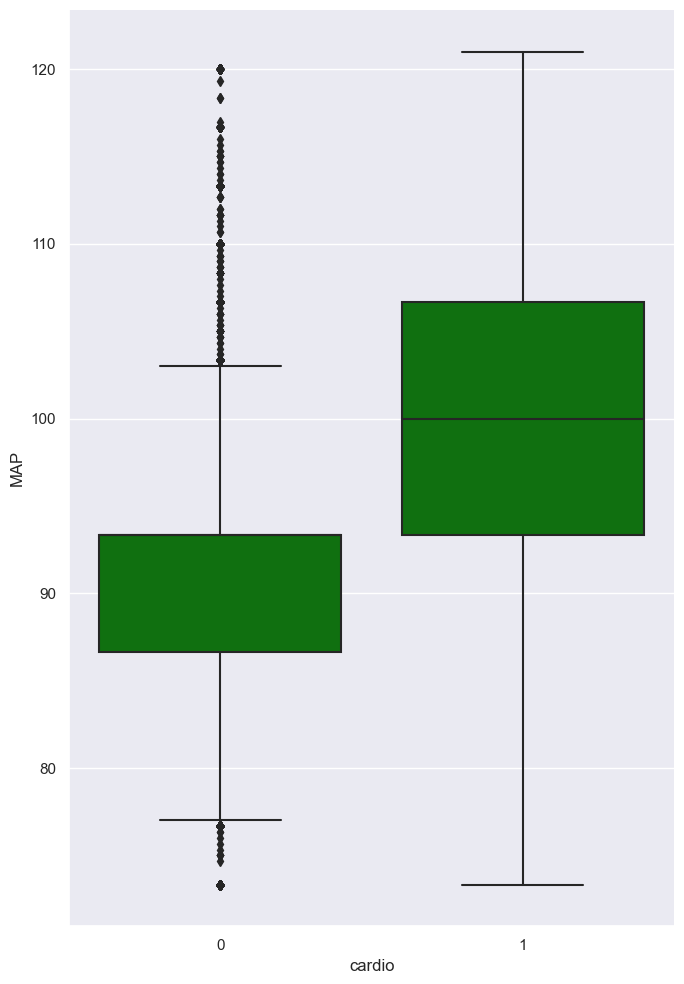

time: 625 ms (started: 2023-11-16 15:45:15 +08:00)


In [42]:
#Mean Arterial Pressure
cardio_df['MAP']= ((2/3)*(cardio_df['ap_lo']) + (cardio_df['ap_hi']/3)).round(2)

sb.catplot(x="cardio", y="MAP",  data=cardio_df, color = "green",kind="box", height=10, aspect=.7)

Creation of Lifestyle Factor [LSF] variable using catergorical variables,

*   gluc
*   cholesterol
* smoke
* alco
* active



Lifestyle Factor is a score system that turns each categorial values into a Score, where the higher the score the more unhealthy

For the *active* variable, 1 = User Exercise and 0 = User does NOT Exercise.

This would not work with the score system, as lower score = healthier and user exercising is the healther option, and should NOT increase the score.

Therefore, we need to invert the Active variable,
to make 1 = User does NOT Exercise and 0 = User exercise.

In [43]:
cardio_df['non_active']= cardio_df['active'].replace([0,1], [1,0])

time: 0 ns (started: 2023-11-16 15:45:16 +08:00)


In [44]:
#Lifestyle Factor
cardio_df['LSF'] = (cardio_df['cholesterol'] + cardio_df['gluc'] + cardio_df['smoke']+ cardio_df['alco'] + cardio_df['non_active'])

time: 16 ms (started: 2023-11-16 15:45:16 +08:00)


In [45]:
cardio_opt = cardio_df[['age_year', 'gender', 'MAP', 'LSF', 'BMI', 'cardio']]
cardio_opt

,age_year,gender,MAP,LSF,BMI,cardio
0,50,2,90.00,2,21.97,0
1,55,1,106.67,4,34.93,1
2,52,1,90.00,5,23.51,1
3,48,2,116.67,2,28.71,1
4,48,1,73.33,3,23.01,0
...,...,...,...,...,...,...
69993,54,1,103.33,2,23.66,1
69994,58,1,103.33,2,29.38,1
69995,53,2,93.33,3,26.93,0
69998,61,1,98.33,4,27.10,1


time: 31 ms (started: 2023-11-16 15:45:16 +08:00)


## Algorithm Switching: Optimisation through use of more suitable model

### Gaussian Naive Bayes Classification Model

In [46]:
# Extract Response and Predictors
b = pd.DataFrame(cardio_opt['cardio'])
A = pd.DataFrame(cardio_opt[['age_year', 'gender', 'MAP', 'LSF', 'BMI']])

# Split the Dataset into Train and Test
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size= 0.25, random_state=1)

time: 16 ms (started: 2023-11-16 15:45:16 +08:00)


In [47]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(A_train, b_train.values.ravel())

gy_pred_test = gnb.predict(A_test)


print('Model accuracy score: {0:0.4f}'. format(accuracy_score(b_test, gy_pred_test)))

Model accuracy score: 0.6961
time: 47 ms (started: 2023-11-16 15:45:16 +08:00)


Gauss Model Accuracy : 0.6961
Gauss Training set accuracy: 0.6982

Gauss Training set score : 0.6982
Gauss Test set score: 0.6961



<Axes: >

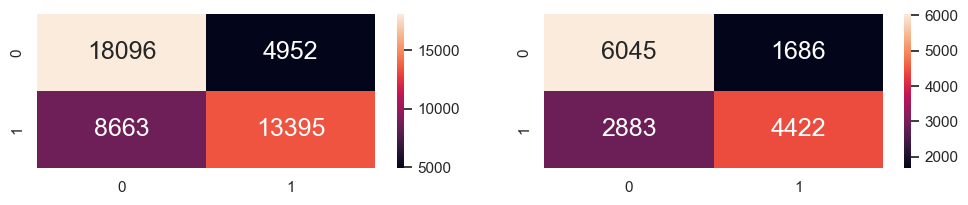

time: 1.05 s (started: 2023-11-16 15:45:16 +08:00)


In [48]:
gy_pred_train = gnb.predict(A_train)

# Check the Model Accuracy
print("Gauss Model Accuracy : {0:0.4f}". format(accuracy_score(b_test, gy_pred_test)))
print('Gauss Training set accuracy: {0:0.4f}'. format(accuracy_score(b_train, gy_pred_train)))
print()


# Check the Model Accuracy
print("Gauss Training set score : {0:0.4f}". format(gnb.score(A_train, b_train)))
print('Gauss Test set score: {0:0.4f}'. format(gnb.score(A_test, b_test)))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 2))
sb.heatmap(confusion_matrix(b_train, gy_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(b_test, gy_pred_test),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [49]:
# print the first 10 predicted probabilities of two classes- 0 and 1

gy_pred_prob = gnb.predict_proba(A_test)[0:10]

gy_pred_prob

# store the probabilities in dataframe

gy_pred_prob_df = pd.DataFrame(data=gy_pred_prob, columns=['Prob of no CVD (0)', 'Prob of CVD (1)'])

gy_pred_prob_df


,Prob of no CVD (0),Prob of CVD (1)
0,0.576562,0.423438
1,0.481963,0.518037
2,0.229197,0.770803
3,0.571142,0.428858
4,0.916882,0.083118
5,0.857191,0.142809
6,0.368918,0.631082
7,0.900325,0.099675
8,0.145809,0.854191
9,0.175982,0.824018


time: 15 ms (started: 2023-11-16 15:45:17 +08:00)


In [50]:
# print the first 10 predicted probabilities for class 1 - Probability of CVD

gnb.predict_proba(A_test)[0:10, 1]


# store the predicted probabilities for class 1 - Probability of CVD

gy_pred1 = gnb.predict_proba(A_test)[:, 1]

time: 16 ms (started: 2023-11-16 15:45:17 +08:00)


Text(0, 0.5, 'Frequency')

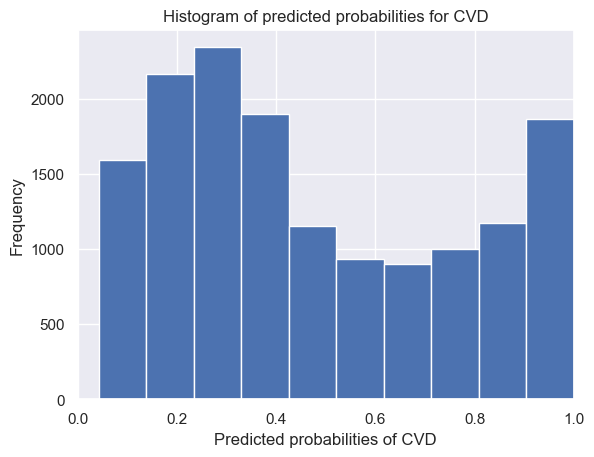

time: 781 ms (started: 2023-11-16 15:45:17 +08:00)


In [51]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(gy_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities for CVD')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of CVD')
plt.ylabel('Frequency')


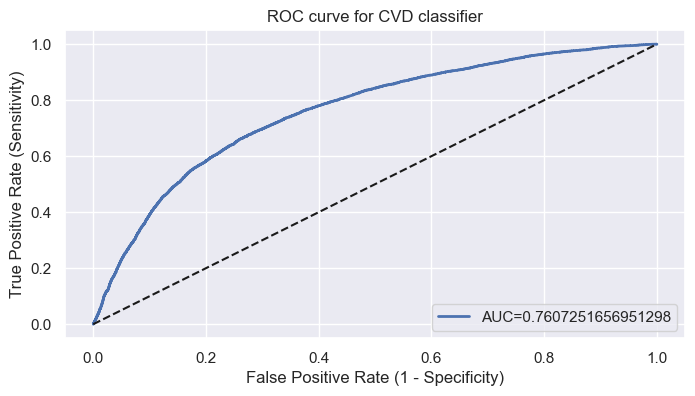

time: 515 ms (started: 2023-11-16 15:45:18 +08:00)


In [52]:
#Create ROC curve
fpr, tpr, _ = roc_curve(b_test,  gy_pred1)
auc = metrics.roc_auc_score(b_test, gy_pred1)

plt.figure(figsize=(8,4))
plt.plot(fpr,tpr, linewidth=2, label="AUC="+str(auc) )

plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('ROC curve for CVD classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

#Display legend on bottom right
plt.legend(loc=4)
plt.show()

Evaluation of model using 5-Fold Cross Validation

In [53]:
# compute Average cross-validation score
# Applying 5-Fold Cross Validation

scores = cross_val_score(gnb, A_train, b_train.values.ravel(), cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.69230769 0.68894801 0.7041348  0.70346968 0.70125263]
Average cross-validation score: 0.6980
time: 172 ms (started: 2023-11-16 15:45:18 +08:00)


### Logistic Regression Classfication Model

In [54]:
#instantiate the model
log_reg = LogisticRegression()

#fit the model using the training data
log_reg.fit(A_train, b_train.values.ravel())

#use model to make predictions on test data
b_pred_test = log_reg.predict(A_test)

#use model to make predictions on train data
b_pred_train = log_reg.predict(A_train)

time: 437 ms (started: 2023-11-16 15:45:18 +08:00)


Logistic Model Accuracy : 0.7078
Logistic Training set accuracy: 0.7105

Logistic Test set score: 0.7078
Logistic Training set score: 0.7105


<Axes: >

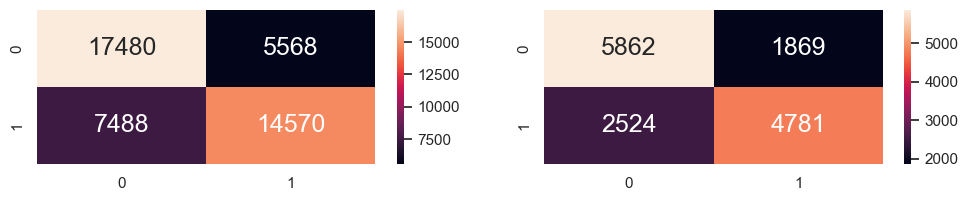

time: 985 ms (started: 2023-11-16 15:45:19 +08:00)


In [55]:
# Check the Model Accuracy
print("Logistic Model Accuracy : {0:0.4f}". format(accuracy_score(b_test, b_pred_test)))
print('Logistic Training set accuracy: {0:0.4f}'. format(accuracy_score(b_train, b_pred_train)))
print()

#Check for overfitting and underfitting
print('Logistic Test set score: {:.4f}'.format(log_reg.score(A_test, b_test)))
print('Logistic Training set score: {:.4f}'.format(log_reg.score(A_train, b_train)))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 2))
sb.heatmap(confusion_matrix(b_train, b_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(b_test, b_pred_test),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [56]:
# print the first 10 predicted probabilities of two classes- 0 and 1

b_pred_prob = log_reg.predict_proba(A_test)[0:10]

b_pred_prob

# store the probabilities in dataframe

b_pred_prob_df = pd.DataFrame(data=b_pred_prob, columns=['Prob of no CVD (0)', 'Prob of CVD (1)'])

b_pred_prob_df

,Prob of no CVD (0),Prob of CVD (1)
0,0.441843,0.558157
1,0.465600,0.534400
2,0.386337,0.613663
3,0.437197,0.562803
4,0.826651,0.173349
5,0.889852,0.110148
6,0.371711,0.628289
7,0.780439,0.219561
8,0.213126,0.786874
9,0.203845,0.796155


time: 16 ms (started: 2023-11-16 15:45:20 +08:00)


In [57]:
# print the first 10 predicted probabilities for class 1 - Probability of CVD

log_reg.predict_proba(A_test)[0:10, 1]


# store the predicted probabilities for class 1 - Probability of CVD

b_pred1 = log_reg.predict_proba(A_test)[:, 1]

time: 0 ns (started: 2023-11-16 15:45:20 +08:00)


Text(0, 0.5, 'Frequency')

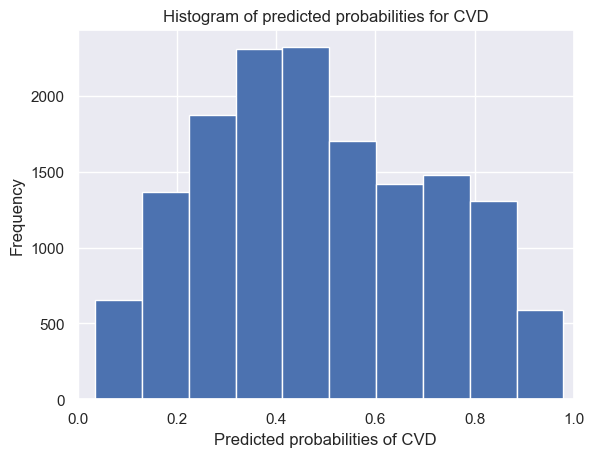

time: 532 ms (started: 2023-11-16 15:45:20 +08:00)


In [58]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(b_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities for CVD')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of CVD')
plt.ylabel('Frequency')

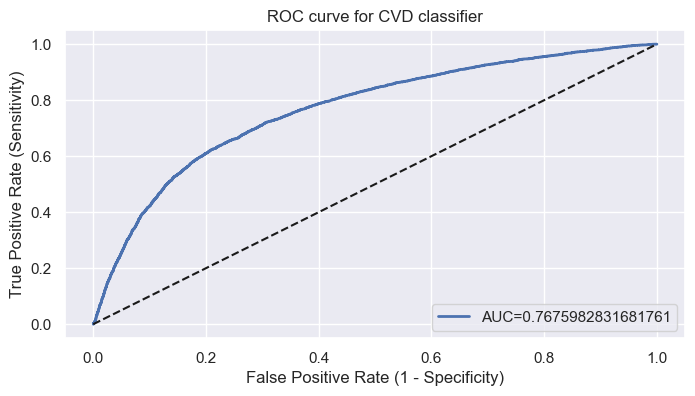

time: 563 ms (started: 2023-11-16 15:45:20 +08:00)


In [59]:
#create ROC curve
fpr, tpr, _ = roc_curve(b_test,  b_pred1)
auc = metrics.roc_auc_score(b_test, b_pred1)

plt.figure(figsize=(8,4))
plt.plot(fpr,tpr, linewidth=2, label="AUC="+str(auc) )

plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('ROC curve for CVD classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

#Display legend on bottom right
plt.legend(loc=4)
plt.show()

In [60]:
# Applying 5-Fold Cross Validation
# compute Average cross-validation score

scores1 = cross_val_score(log_reg , A_train, b_train.values.ravel(), cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores1))
print('Average cross-validation score: {:.4f}'.format(scores1.mean()))

Cross-validation scores:[0.70394591 0.70502162 0.71544175 0.71466578 0.7134464 ]
Average cross-validation score: 0.7105
time: 1.78 s (started: 2023-11-16 15:45:21 +08:00)


### Hyperparameter Optimisation: Optimisation through GridSearch Method

In [61]:
# Setup hyperparameter search

parameters = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]
               }

grid_search = GridSearchCV(log_reg,
                    param_grid = parameters,
                    cv =5,
                    verbose = 0)

grid_search.fit(A_train, b_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']})

time: 26.4 s (started: 2023-11-16 15:45:23 +08:00)


In [62]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7105


Parameters that give the best results : 

 {'C': 17.433288221999874, 'solver': 'liblinear'}


Estimator that was chosen by the search : 

 LogisticRegression(C=17.433288221999874, solver='liblinear')
time: 0 ns (started: 2023-11-16 15:45:49 +08:00)


In [63]:
log_reg2=LogisticRegression(C=17.433288221999874, solver='liblinear')
log_reg2.fit(A_train, b_train)

grid_search2 = GridSearchCV(log_reg2,
                    param_grid = parameters,
                    cv =5,
                    verbose = 0)

grid_search2.fit(A_train, b_train.values.ravel())

C:\Users\Nicho\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=17.433288221999874,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']})

time: 27 s (started: 2023-11-16 15:45:49 +08:00)


In [64]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search2.score(A_test, b_test)))

GridSearch CV score on test set: 0.7078
time: 16 ms (started: 2023-11-16 15:46:16 +08:00)


In [65]:
# print the first 10 predicted probabilities of two classes- 0 and 1

gb_pred_prob = grid_search2.predict_proba(A_test)[0:10]

gb_pred_prob

array([[0.44187372, 0.55812628],
       [0.46579031, 0.53420969],
       [0.38656588, 0.61343412],
       [0.43724154, 0.56275846],
       [0.82639323, 0.17360677],
       [0.88953282, 0.11046718],
       [0.37203768, 0.62796232],
       [0.78002153, 0.21997847],
       [0.21360272, 0.78639728],
       [0.20429999, 0.79570001]])

time: 15 ms (started: 2023-11-16 15:46:16 +08:00)


In [66]:
# print the first 10 predicted probabilities for class 1 - Probability of CVD

grid_search2.predict_proba(A_test)[0:10, 1]

# store the predicted probabilities for class 1 - Probability of CVD

gb_pred1 = grid_search2.predict_proba(A_test)[:, 1]

time: 0 ns (started: 2023-11-16 15:46:16 +08:00)


Text(0, 0.5, 'Frequency')

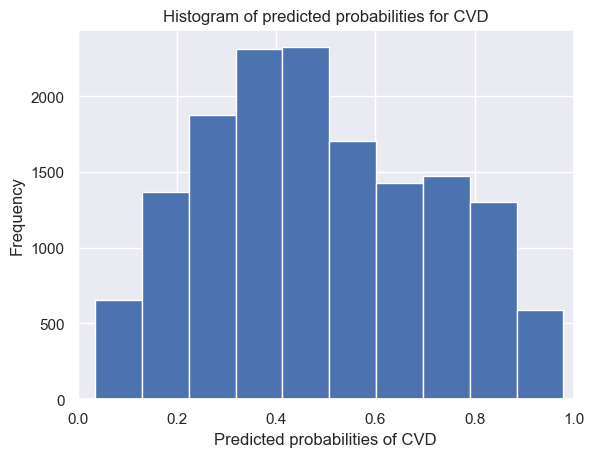

time: 546 ms (started: 2023-11-16 15:46:16 +08:00)


In [67]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(gb_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities for CVD')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of CVD')
plt.ylabel('Frequency')

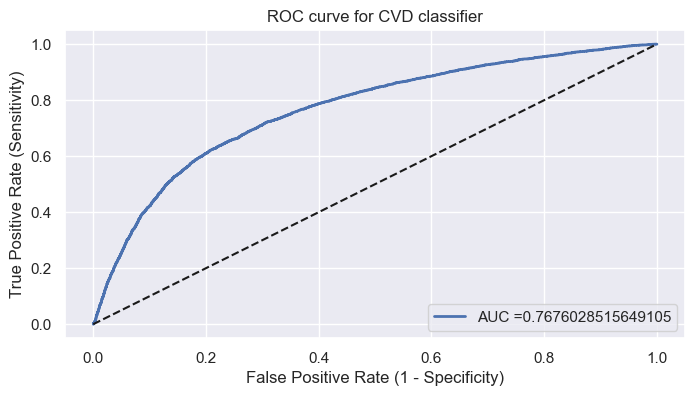

time: 531 ms (started: 2023-11-16 15:46:17 +08:00)


In [68]:
#create ROC curve
fpr, tpr, _ = roc_curve(b_test,  gb_pred1)
auc = metrics.roc_auc_score(b_test, gb_pred1)

plt.figure(figsize=(8,4))
plt.plot(fpr,tpr, linewidth=2, label="AUC =" +str(auc) )

plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12

plt.title('ROC curve for CVD classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

#Display legend on bottom right
plt.legend(loc=4)
plt.show()

Evaluation of GridSearch CV using 5-Fold Cross Validation

In [69]:
# Applying 5-Fold Cross Validation
# compute Average cross-validation score

scores2 = cross_val_score(grid_search2, A_train, b_train.values.ravel(), cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores2))
print('Average cross-validation score: {:.4f}'.format(scores2.mean()))

Cross-validation scores:[0.70405675 0.70535417 0.71544175 0.71455493 0.71255958]
Average cross-validation score: 0.7104
time: 1min 44s (started: 2023-11-16 15:46:17 +08:00)


Models Used For This Project:

Decision Tree [3.02s]
- Accuracy: 0.718

Naive Bayes: Fast and Simple, Low Sensitivity [49.6ms]
- Accuracy = 0.696
- Sensitivity = 0.7607

Logistic Regression: Longer, Higher Sensitivity [1.08s]
- Accuracy [K Fold]  = 0.7105
- Sensitivity = 0.7675

Grid Search: Optimisation method, takes the longest time, gives highest Sensitivity. [28.1s]
- Accuracy [K Fold] = 0.7104
- Sensitivity = 0.7676

Through the use of various models, we are able to predict whether a person will get Cardiovascular Disease, with a Sensitivity Rate of 76.8%

# IF ANY ERROR USE GOOGLE COLAB IN THE LINK DOWN BELOW:

https://colab.research.google.com/drive/1d8M-LK3AzPJRH2ZExAZnw-WVwmByU04S?usp=sharing